# Install Dependencies

In [54]:
!pip install ultralytics wandb comet_ml matplotlib pandas opencv-python

# Import Dependencies

In [55]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from ultralytics import YOLO
from google.colab import drive

# Mount Google Drive



In [56]:
# Check if Drive is already mounted
if not os.path.ismount('/content/drive'):
    drive.mount('/content/drive')
else:
    print("Google Drive is already mounted.")

Google Drive is already mounted.


# Dataset

Check available datasets for our experiments

In [57]:
!ls -la /content/drive/MyDrive/NYP/IT107_Assignment/datasets/YOLOv8/IT107_Assignment*.zip

-rw------- 1 root root  14483935 Jan  4 15:51 /content/drive/MyDrive/NYP/IT107_Assignment/datasets/YOLOv8/IT107_Assignment.v1i.yolov8.zip
-rw------- 1 root root  14489441 Jan  4 19:08 /content/drive/MyDrive/NYP/IT107_Assignment/datasets/YOLOv8/IT107_Assignment.v2i.yolov8.zip
-rw------- 1 root root 609584654 Jan  4 20:49 /content/drive/MyDrive/NYP/IT107_Assignment/datasets/YOLOv8/IT107_Assignment.v3i.yolov8.zip


## Explanatory Notes

Annotated datasets:

* IT107_Assignment.v2i.yolov8.zip
  * Dataset split:
    * Train: 231 images (71%)
    * Valid Set: 62 images (10%)
    * Test Set: 34 images (10%)
  * Default data preprocessing (Auto-Orient, Resize: Strech to 640 x 640)
  * No Augmentation is applied.

This dataset will be used to train pre-trained YOLO model to find the best results.


## Create Datasets Extraction Paths

In [58]:
# Dataset extraction paths
datasets = {
    "test_dataset_1": "/content/drive/MyDrive/NYP/IT107_Assignment/datasets/YOLOv8/IT107_Assignment.v2i.yolov8.zip"
}

In [59]:
# Extract datasets if not already extracted
for key, zip_path in datasets.items():
    extract_path = f"/content/{key}"
    if not os.path.exists(extract_path):
        print(f"Extracting {key}...")
        !unzip -q "{zip_path}" -d "{extract_path}"
    else:
        print(f"{key} already extracted.")


test_dataset_1 already extracted.


## Data Imbalance Check

In [60]:
def check_imbalance(label_dir, dataset_name):
    # Initialize counters
    class_counts = {}

    # Count occurrences of each class
    for label_file in os.listdir(label_dir):
        with open(os.path.join(label_dir, label_file), "r") as f:
            for line in f:
                class_id = line.split()[0]  # The first value in each line is the class ID
                class_counts[class_id] = class_counts.get(class_id, 0) + 1

    # Display class counts
    print(f"Class Distribution for {dataset_name}:")
    for class_id, count in class_counts.items():
        print(f"Class {class_id}: {count}")

# Check imbalance for both datasets
check_imbalance("/content/test_dataset_1/train/labels", "Dataset 1")


Class Distribution for Dataset 1:
Class 1: 192
Class 0: 242


# Model Training Experiment

## Define Experiments

In [61]:
# Define experiments
experiments = [
    # 1st Dataset (Default Annotations)
    {"name": "train_baseline", "lr0": 0.01, "augment": False, "dataset": "/content/test_dataset_1/data.yaml", "model": "yolov8s.pt"},
    {"name": "train_augment", "lr0": 0.01, "augment": True, "dataset": "/content/test_dataset_1/data.yaml", "model": "yolov8s.pt"},
    {"name": "train_lr_finetuned", "lr0": 0.001, "augment": False, "dataset": "/content/test_dataset_1/data.yaml", "model": "yolov8s.pt"},
    {"name": "train_larger_model", "lr0": 0.01, "augment": False, "dataset": "/content/test_dataset_1/data.yaml", "model": "yolov8m.pt"}
]

## Running Experiements

In [62]:
# Log into Weights & Biases (wandb) - dee1fe8327202ba6553c9fed9b5cee0fdfb499fc
import wandb
import random

wandb.login()


True

In [63]:
# Initialize results list
results_list = []

In [64]:
from ultralytics import settings

settings.update({
    "wandb": True,          # Enable Weights & Biases logging
    "tensorboard": False    # Disable TensorBoard logging
})

Starting experiment: train_baseline...


100%|██████████| 21.5M/21.5M [00:00<00:00, 148MB/s]


Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/test_dataset_1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=0, workers=8, project=train_baseline, name=train_baseline, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

100%|██████████| 755k/755k [00:00<00:00, 14.9MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 59.6MB/s]


AMP: checks passed ✅


train: Scanning /content/test_dataset_1/train/labels... 231 images, 0 backgrounds, 0 corrupt: 100%|██████████| 231/231 [00:00<00:00, 1216.17it/s]

train: New cache created: /content/test_dataset_1/train/labels.cache


WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 151, len(boxes) = 434. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/test_dataset_1/valid/labels... 62 images, 0 backgrounds, 0 corrupt: 100%|██████████| 62/62 [00:00<00:00, 978.30it/s]

val: New cache created: /content/test_dataset_1/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 66, len(boxes) = 151. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to train_baseline/train_baseline/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to train_baseline/train_baseline
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.93G      1.246      2.966      1.485         24        640: 100%|██████████| 15/15 [00:05<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all         62        151      0.455      0.556      0.506      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.02G      1.109      1.751      1.348         23        640: 100%|██████████| 15/15 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         62        151        0.6      0.547       0.57      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.07G      1.209      1.627      1.387         17        640: 100%|██████████| 15/15 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all         62        151      0.404      0.398      0.336      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.02G      1.244      1.479      1.376         28        640: 100%|██████████| 15/15 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all         62        151      0.399      0.336      0.246      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.03G      1.293      1.549      1.454         29        640: 100%|██████████| 15/15 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]

                   all         62        151      0.516      0.491      0.375      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.97G      1.276      1.477        1.4         41        640: 100%|██████████| 15/15 [00:03<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         62        151      0.366      0.404      0.204        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.05G      1.256       1.42      1.433         17        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         62        151       0.35      0.453      0.316      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       3.9G      1.284      1.358      1.436         33        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         62        151      0.153       0.32      0.128     0.0572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.01G      1.344      1.483      1.488         13        640: 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all         62        151      0.387      0.551      0.348      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.89G      1.305      1.417      1.466         18        640: 100%|██████████| 15/15 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         62        151      0.404      0.547      0.394      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.07G       1.23      1.303      1.407         18        640: 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         62        151      0.529      0.491      0.384      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.06G      1.238       1.28      1.419         30        640: 100%|██████████| 15/15 [00:03<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         62        151      0.493      0.567      0.535        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.03G      1.307       1.38      1.475         17        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         62        151       0.39      0.599      0.499      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.87G      1.287      1.407      1.441         29        640: 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         62        151       0.46      0.446      0.403      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.04G      1.159       1.22      1.353         22        640: 100%|██████████| 15/15 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         62        151      0.652      0.495      0.503      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.11G       1.18      1.178      1.335         25        640: 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         62        151      0.715      0.524      0.589      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.02G      1.119      1.128      1.321         23        640: 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         62        151      0.671      0.546      0.594      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.06G      1.115      1.141      1.315         28        640: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         62        151      0.532      0.525       0.49      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.04G      1.109      1.077      1.314         17        640: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         62        151      0.758      0.524      0.589      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.85G      1.075      1.031      1.283         20        640: 100%|██████████| 15/15 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         62        151      0.757      0.476       0.59      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.02G      1.113      1.017      1.302         19        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         62        151      0.651      0.563      0.599      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       3.9G      1.051     0.9624      1.291         26        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         62        151      0.646      0.621      0.686      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.03G      1.026     0.9575      1.248         28        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         62        151      0.781      0.631      0.722      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.88G      1.023     0.9845      1.253         23        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         62        151      0.735      0.599      0.642      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         4G     0.9943     0.9132      1.225         28        640: 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         62        151      0.732      0.571      0.639      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.03G      1.059     0.9569      1.291         10        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         62        151      0.753      0.632      0.682      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.04G     0.9428     0.8625      1.208         27        640: 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         62        151      0.751      0.585      0.664      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       3.9G     0.9653      0.931      1.238         24        640: 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all         62        151      0.812      0.602      0.695      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.02G     0.9527     0.8344      1.192         27        640: 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         62        151      0.752      0.642       0.69      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.05G      0.886     0.8134      1.173         20        640: 100%|██████████| 15/15 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         62        151      0.746      0.577      0.662      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.89G       0.93     0.8251      1.199         20        640: 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         62        151      0.712      0.628      0.666      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.06G     0.9119     0.8163      1.167         12        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         62        151      0.764      0.583      0.669      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         4G     0.8887     0.7706      1.174         28        640: 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         62        151       0.77      0.689       0.71       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.89G     0.8672      0.715      1.137         23        640: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         62        151       0.75      0.637      0.697      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.05G     0.8734     0.7776      1.161         12        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         62        151      0.794      0.631      0.709      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.07G     0.9043     0.7241      1.175         19        640: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         62        151      0.749       0.61      0.675      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.03G     0.8546     0.7209      1.138         11        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         62        151      0.817      0.616      0.706      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.89G     0.8481     0.7202      1.123         28        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         62        151      0.785      0.635      0.696      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.05G     0.8196     0.7057      1.157         15        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         62        151      0.734      0.712      0.705      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.06G     0.8555     0.7097      1.162         26        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         62        151      0.717      0.675      0.711      0.501


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.86G     0.7576     0.6374      1.106         16        640: 100%|██████████| 15/15 [00:04<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all         62        151      0.736      0.659      0.713      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.06G      0.718     0.5931      1.071         12        640: 100%|██████████| 15/15 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         62        151      0.773      0.678      0.734      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.03G     0.7027      0.579      1.042         11        640: 100%|██████████| 15/15 [00:03<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         62        151      0.808      0.688      0.745      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       3.9G     0.6856     0.5536      1.051          8        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         62        151      0.795      0.694      0.746      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.02G     0.6806      0.565      1.028         12        640: 100%|██████████| 15/15 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         62        151      0.836      0.686      0.745      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.88G     0.6669     0.5266      1.023         12        640: 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         62        151      0.759       0.72       0.74      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.02G     0.6559     0.5037       1.03         13        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         62        151        0.8      0.667      0.734      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.04G     0.6352     0.4713      1.014          8        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         62        151      0.768      0.723       0.76      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         4G     0.6199     0.4663      1.001         15        640: 100%|██████████| 15/15 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         62        151      0.768      0.727      0.764      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.03G     0.6257     0.4565     0.9959         11        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         62        151      0.771      0.717      0.761      0.516



50 epochs completed in 0.073 hours.
Optimizer stripped from train_baseline/train_baseline/weights/last.pt, 22.5MB
Optimizer stripped from train_baseline/train_baseline/weights/best.pt, 22.5MB

Validating train_baseline/train_baseline/weights/best.pt...
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]


                   all         62        151      0.773      0.727      0.765      0.519
                   hat         41         70      0.808      0.829      0.854      0.652
            sunglasses         39         81      0.738      0.626      0.675      0.386
Speed: 0.2ms preprocess, 5.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to train_baseline/train_baseline


lr/pg0,▂▃▄▅▆███▇▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▂▃▄▅▆████▇▇▇▇▇▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▂▃▄▅▆████▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁▁
metrics/mAP50(B),▅▆▃▂▄▃▁▃▄▄▅▄▅▆▆▆▆▆▇█▇▇▇▇▇▇▇▇▇▇▇▇▇███████
metrics/mAP50-95(B),▅▃▂▃▂▁▃▃▃▅▅▅▆▅▆▅▇▇▇▇▆▇▇▇▇▇▇█▇███████████
metrics/precision(B),▄▆▄▄▅▃▁▃▅▄▄▆▇▆▅▇▆▆▇▇▇█▇▇▇▇▇█▇█▇▇▇▇██▇█▇▇
metrics/recall(B),▅▅▂▁▄▃▁▅▅▄▆▃▄▅▅▅▄▅▆▆▅▆▆▆▇▆▇▆▆▆▆█▇▇▇▇█▇██
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▆▇▇█▇██▇▇█▆▆▆▆▆▆▅▅▅▅▄▄▄▄▄▄▃▃▄▃▃▃▂▂▂▂▁▁▁▁


Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/test_dataset_1/valid/labels.cache... 62 images, 0 backgrounds, 0 corrupt: 100%|██████████| 62/62 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 66, len(boxes) = 151. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]


                   all         62        151      0.767      0.728      0.764      0.519
                   hat         41         70      0.807      0.829      0.854      0.652
            sunglasses         39         81      0.728      0.626      0.675      0.386
Speed: 0.2ms preprocess, 13.9ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to train_baseline/train_baseline2
Starting experiment: train_augment...
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/test_dataset_1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=0, workers=8, project=train_augment, name=train_augment, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /content/test_dataset_1/train/labels.cache... 231 images, 0 backgrounds, 0 corrupt: 100%|██████████| 231/231 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 151, len(boxes) = 434. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/test_dataset_1/valid/labels.cache... 62 images, 0 backgrounds, 0 corrupt: 100%|██████████| 62/62 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 66, len(boxes) = 151. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to train_augment/train_augment/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to train_augment/train_augment
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.05G      1.246      2.966      1.485         24        640: 100%|██████████| 15/15 [00:03<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         62        151      0.455      0.556      0.506      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.06G      1.109      1.751      1.348         23        640: 100%|██████████| 15/15 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         62        151        0.6      0.547       0.57      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       4.1G      1.209      1.627      1.387         17        640: 100%|██████████| 15/15 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         62        151      0.404      0.398      0.336      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.06G      1.244      1.479      1.376         28        640: 100%|██████████| 15/15 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all         62        151      0.399      0.336      0.246      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.07G      1.293      1.549      1.454         29        640: 100%|██████████| 15/15 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         62        151      0.516      0.491      0.375      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.01G      1.276      1.477        1.4         41        640: 100%|██████████| 15/15 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         62        151      0.366      0.404      0.204        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.08G      1.256       1.42      1.433         17        640: 100%|██████████| 15/15 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         62        151       0.35      0.453      0.316      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       4.1G      1.284      1.358      1.436         33        640: 100%|██████████| 15/15 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         62        151      0.153       0.32      0.128     0.0572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.04G      1.344      1.483      1.488         13        640: 100%|██████████| 15/15 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all         62        151      0.387      0.551      0.348      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.08G      1.305      1.417      1.466         18        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         62        151      0.404      0.547      0.394      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.11G       1.23      1.303      1.407         18        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         62        151      0.529      0.491      0.384      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.94G      1.238       1.28      1.419         30        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all         62        151      0.493      0.567      0.535        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.06G      1.307       1.38      1.475         17        640: 100%|██████████| 15/15 [00:03<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         62        151       0.39      0.599      0.499      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.06G      1.287      1.407      1.441         29        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         62        151       0.46      0.446      0.403      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.08G      1.159       1.22      1.353         22        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         62        151      0.652      0.495      0.503      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.13G       1.18      1.178      1.335         25        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         62        151      0.715      0.524      0.589      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.08G      1.119      1.128      1.321         23        640: 100%|██████████| 15/15 [00:03<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         62        151      0.671      0.546      0.594      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.92G      1.115      1.141      1.315         28        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         62        151      0.532      0.525       0.49      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.07G      1.109      1.077      1.314         17        640: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         62        151      0.758      0.524      0.589      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.89G      1.075      1.031      1.283         20        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         62        151      0.757      0.476       0.59      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.05G      1.113      1.017      1.302         19        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         62        151      0.651      0.563      0.599      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.11G      1.051     0.9624      1.291         26        640: 100%|██████████| 15/15 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         62        151      0.646      0.621      0.686      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.07G      1.026     0.9575      1.248         28        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         62        151      0.781      0.631      0.722      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.07G      1.023     0.9845      1.253         23        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         62        151      0.735      0.599      0.642      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.04G     0.9943     0.9132      1.225         28        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         62        151      0.732      0.571      0.639      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.08G      1.059     0.9569      1.291         10        640: 100%|██████████| 15/15 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         62        151      0.753      0.632      0.682      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.92G     0.9428     0.8625      1.208         27        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         62        151      0.751      0.585      0.664      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       4.1G     0.9653      0.931      1.238         24        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         62        151      0.812      0.602      0.695      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.06G     0.9527     0.8344      1.192         27        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         62        151      0.752      0.642       0.69      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       4.1G      0.886     0.8134      1.173         20        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         62        151      0.746      0.577      0.662      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.09G       0.93     0.8251      1.199         20        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         62        151      0.712      0.628      0.666      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       4.1G     0.9119     0.8163      1.167         12        640: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         62        151      0.764      0.583      0.669      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.04G     0.8887     0.7706      1.174         28        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         62        151       0.77      0.689       0.71       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       4.1G     0.8672      0.715      1.137         23        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         62        151       0.75      0.637      0.697      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.92G     0.8734     0.7776      1.161         12        640: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         62        151      0.794      0.631      0.709      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.12G     0.9043     0.7241      1.175         19        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         62        151      0.749       0.61      0.675      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.06G     0.8546     0.7209      1.138         11        640: 100%|██████████| 15/15 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         62        151      0.817      0.616      0.706      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.08G     0.8481     0.7202      1.123         28        640: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         62        151      0.785      0.635      0.696      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.92G     0.8196     0.7057      1.157         15        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all         62        151      0.734      0.712      0.705      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.11G     0.8555     0.7097      1.162         26        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         62        151      0.717      0.675      0.711      0.501


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.06G     0.7576     0.6374      1.106         16        640: 100%|██████████| 15/15 [00:04<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         62        151      0.736      0.659      0.713      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       4.1G      0.718     0.5931      1.071         12        640: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         62        151      0.773      0.678      0.734      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.08G     0.7027      0.579      1.042         11        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         62        151      0.808      0.688      0.745      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       4.1G     0.6856     0.5536      1.051          8        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         62        151      0.795      0.694      0.746      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.06G     0.6806      0.565      1.028         12        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]

                   all         62        151      0.836      0.686      0.745      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.08G     0.6669     0.5266      1.023         12        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         62        151      0.759       0.72       0.74      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       3.9G     0.6559     0.5037       1.03         13        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         62        151        0.8      0.667      0.734      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.08G     0.6352     0.4713      1.014          8        640: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         62        151      0.768      0.723       0.76      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.04G     0.6199     0.4663      1.001         15        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         62        151      0.768      0.727      0.764      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.08G     0.6257     0.4565     0.9959         11        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         62        151      0.771      0.717      0.761      0.516



50 epochs completed in 0.094 hours.
Optimizer stripped from train_augment/train_augment/weights/last.pt, 22.5MB
Optimizer stripped from train_augment/train_augment/weights/best.pt, 22.5MB

Validating train_augment/train_augment/weights/best.pt...
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]


                   all         62        151      0.786        0.7      0.763      0.548
                   hat         41         70      0.795      0.757      0.837       0.67
            sunglasses         39         81      0.777      0.642      0.688      0.426
Speed: 0.2ms preprocess, 12.6ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to train_augment/train_augment


lr/pg0,▂▃▄▅▆████▇▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁
lr/pg1,▂▃▄▅▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▂▃▄▆███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▅▆▃▄▂▁▃▄▅▅▅▆▆▅▆▆▇█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇███████
metrics/mAP50-95(B),▄▅▂▁▂▂▁▂▂▄▃▄▅▅▄▅▅▇▆▆▆▆▆▆▆▇▇▇▆▇▇▇▇▇▇▇▇▇▇█
metrics/precision(B),▄▆▄▄▅▃▁▄▅▄▄▆▇▆▅▇▆▆▇▇▇▇█▇▇▇▇█▇█▇▇▇▇██▇█▇▇
metrics/recall(B),▅▂▁▄▂▁▅▅▄▅▃▄▅▅▅▄▅▆▆▆▆▆▆▇▅▆▇▇▆▆█▇▇▇▇▇█▇██
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▇▆▇▇█▇▇██▇▇▆▆▆▆▅▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁▁▁


Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/test_dataset_1/valid/labels.cache... 62 images, 0 backgrounds, 0 corrupt: 100%|██████████| 62/62 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 66, len(boxes) = 151. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]


                   all         62        151      0.794        0.7      0.763      0.549
                   hat         41         70      0.808      0.757      0.838       0.67
            sunglasses         39         81       0.78      0.642      0.688      0.427
Speed: 0.4ms preprocess, 30.0ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to train_augment/train_augment2
Starting experiment: train_lr_finetuned...
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/test_dataset_1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=0, workers=8, project=train_lr_finetuned, name=train_lr_finetuned, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freez

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /content/test_dataset_1/train/labels.cache... 231 images, 0 backgrounds, 0 corrupt: 100%|██████████| 231/231 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 151, len(boxes) = 434. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/test_dataset_1/valid/labels.cache... 62 images, 0 backgrounds, 0 corrupt: 100%|██████████| 62/62 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 66, len(boxes) = 151. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to train_lr_finetuned/train_lr_finetuned/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to train_lr_finetuned/train_lr_finetuned
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.88G      1.246      2.966      1.485         24        640: 100%|██████████| 15/15 [00:03<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         62        151      0.455      0.556      0.506      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.08G      1.109      1.751      1.348         23        640: 100%|██████████| 15/15 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         62        151        0.6      0.547       0.57      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.13G      1.209      1.627      1.387         17        640: 100%|██████████| 15/15 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         62        151      0.404      0.398      0.336      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.06G      1.244      1.479      1.376         28        640: 100%|██████████| 15/15 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         62        151      0.399      0.336      0.246      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.07G      1.293      1.549      1.454         29        640: 100%|██████████| 15/15 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         62        151      0.516      0.491      0.375      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.01G      1.276      1.477        1.4         41        640: 100%|██████████| 15/15 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         62        151      0.366      0.404      0.204        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.11G      1.256       1.42      1.433         17        640: 100%|██████████| 15/15 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         62        151       0.35      0.453      0.316      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       4.1G      1.284      1.358      1.436         33        640: 100%|██████████| 15/15 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         62        151      0.153       0.32      0.128     0.0572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.05G      1.344      1.483      1.488         13        640: 100%|██████████| 15/15 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         62        151      0.387      0.551      0.348      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       4.1G      1.305      1.417      1.466         18        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         62        151      0.404      0.547      0.394      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.11G       1.23      1.303      1.407         18        640: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         62        151      0.529      0.491      0.384      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       4.1G      1.238       1.28      1.419         30        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]

                   all         62        151      0.493      0.567      0.535        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.06G      1.307       1.38      1.475         17        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         62        151       0.39      0.599      0.499      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.08G      1.287      1.407      1.441         29        640: 100%|██████████| 15/15 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         62        151       0.46      0.446      0.403      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.92G      1.159       1.22      1.353         22        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         62        151      0.652      0.495      0.503      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.15G       1.18      1.178      1.335         25        640: 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         62        151      0.715      0.524      0.589      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.07G      1.119      1.128      1.321         23        640: 100%|██████████| 15/15 [00:03<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         62        151      0.671      0.546      0.594      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       4.1G      1.115      1.141      1.315         28        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         62        151      0.532      0.525       0.49      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.92G      1.109      1.077      1.314         17        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         62        151      0.758      0.524      0.589      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.89G      1.075      1.031      1.283         20        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         62        151      0.757      0.476       0.59      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.05G      1.113      1.017      1.302         19        640: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         62        151      0.651      0.563      0.599      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.11G      1.051     0.9624      1.291         26        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         62        151      0.646      0.621      0.686      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.08G      1.026     0.9575      1.248         28        640: 100%|██████████| 15/15 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         62        151      0.781      0.631      0.722      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.07G      1.023     0.9845      1.253         23        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         62        151      0.735      0.599      0.642      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.04G     0.9943     0.9132      1.225         28        640: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         62        151      0.732      0.571      0.639      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.08G      1.059     0.9569      1.291         10        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         62        151      0.753      0.632      0.682      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.08G     0.9428     0.8625      1.208         27        640: 100%|██████████| 15/15 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         62        151      0.751      0.585      0.664      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.93G     0.9653      0.931      1.238         24        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         62        151      0.812      0.602      0.695      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.05G     0.9527     0.8344      1.192         27        640: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         62        151      0.752      0.642       0.69      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       4.1G      0.886     0.8134      1.173         20        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         62        151      0.746      0.577      0.662      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.09G       0.93     0.8251      1.199         20        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         62        151      0.712      0.628      0.666      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       4.1G     0.9119     0.8163      1.167         12        640: 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         62        151      0.764      0.583      0.669      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.05G     0.8887     0.7706      1.174         28        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         62        151       0.77      0.689       0.71       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       4.1G     0.8672      0.715      1.137         23        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         62        151       0.75      0.637      0.697      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.08G     0.8734     0.7776      1.161         12        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         62        151      0.794      0.631      0.709      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.11G     0.9043     0.7241      1.175         19        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         62        151      0.749       0.61      0.675      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.06G     0.8546     0.7209      1.138         11        640: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         62        151      0.817      0.616      0.706      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.08G     0.8481     0.7202      1.123         28        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         62        151      0.785      0.635      0.696      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.93G     0.8196     0.7057      1.157         15        640: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         62        151      0.734      0.712      0.705      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       4.1G     0.8555     0.7097      1.162         26        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         62        151      0.717      0.675      0.711      0.501


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.05G     0.7576     0.6374      1.106         16        640: 100%|██████████| 15/15 [00:04<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         62        151      0.736      0.659      0.713      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.09G      0.718     0.5931      1.071         12        640: 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         62        151      0.773      0.678      0.734      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.07G     0.7027      0.579      1.042         11        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         62        151      0.808      0.688      0.745      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.94G     0.6856     0.5536      1.051          8        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         62        151      0.795      0.694      0.746      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.06G     0.6806      0.565      1.028         12        640: 100%|██████████| 15/15 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         62        151      0.836      0.686      0.745      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.07G     0.6669     0.5266      1.023         12        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         62        151      0.759       0.72       0.74      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       3.9G     0.6559     0.5037       1.03         13        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         62        151        0.8      0.667      0.734      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.92G     0.6352     0.4713      1.014          8        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         62        151      0.768      0.723       0.76      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.05G     0.6199     0.4663      1.001         15        640: 100%|██████████| 15/15 [00:03<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         62        151      0.768      0.727      0.764      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.08G     0.6257     0.4565     0.9959         11        640: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         62        151      0.771      0.717      0.761      0.516



50 epochs completed in 0.106 hours.
Optimizer stripped from train_lr_finetuned/train_lr_finetuned/weights/last.pt, 22.5MB
Optimizer stripped from train_lr_finetuned/train_lr_finetuned/weights/best.pt, 22.5MB

Validating train_lr_finetuned/train_lr_finetuned/weights/best.pt...
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]


                   all         62        151      0.773      0.727      0.765      0.519
                   hat         41         70      0.808      0.829      0.854      0.652
            sunglasses         39         81      0.738      0.626      0.675      0.386
Speed: 0.2ms preprocess, 5.2ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to train_lr_finetuned/train_lr_finetuned


lr/pg0,▂▃▄▅▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁▁
lr/pg1,▂▃▄▅▆███▇▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▂▃▄▅▆███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▅▆▃▂▄▃▁▃▄▄▅▄▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇██████
metrics/mAP50-95(B),▅▆▃▂▃▃▁▃▃▃▄▅▅▆▅▆▅▇▇▇▆▇▇▇▇▇▇█▇███████████
metrics/precision(B),▄▆▄▄▅▃▁▃▄▅▃▄▆▇▆▇▇▆▇▇▇█▇▇▇▇▇█▇█▇▇▇▇██▇█▇▇
metrics/recall(B),▅▅▂▁▄▃▁▅▅▄▆▃▄▅▅▅▄▅▆▆▅▆▆▆▇▆▆▇▆▆▆█▇▇▇▇▇█▇█
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▇▆▇▇█▇▇██▇█▇▆▆▆▆▅▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▁▁▁


Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/test_dataset_1/valid/labels.cache... 62 images, 0 backgrounds, 0 corrupt: 100%|██████████| 62/62 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 66, len(boxes) = 151. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]


                   all         62        151      0.767      0.728      0.764      0.519
                   hat         41         70      0.807      0.829      0.854      0.652
            sunglasses         39         81      0.728      0.626      0.675      0.386
Speed: 0.2ms preprocess, 10.4ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to train_lr_finetuned/train_lr_finetuned2
Starting experiment: train_larger_model...


100%|██████████| 49.7M/49.7M [00:00<00:00, 249MB/s]


Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/test_dataset_1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=0, workers=8, project=train_larger_model, name=train_larger_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /content/test_dataset_1/train/labels.cache... 231 images, 0 backgrounds, 0 corrupt: 100%|██████████| 231/231 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 151, len(boxes) = 434. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/test_dataset_1/valid/labels.cache... 62 images, 0 backgrounds, 0 corrupt: 100%|██████████| 62/62 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 66, len(boxes) = 151. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to train_larger_model/train_larger_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to train_larger_model/train_larger_model
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.79G       1.22      3.085      1.524         24        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         62        151       0.66      0.414      0.433       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.79G      1.215      1.907      1.487         23        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         62        151      0.348      0.541      0.326      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.89G      1.309      1.924      1.521         17        640: 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         62        151    0.00804      0.336    0.00494    0.00177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.77G      1.405      1.904      1.612         28        640: 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         62        151     0.0034      0.401    0.00348    0.00131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.81G      1.481      1.802      1.662         29        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         62        151    0.00883     0.0929     0.0037   0.000906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.81G      1.495      1.766      1.656         41        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         62        151    0.00937      0.287    0.00572    0.00303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.86G      1.366      1.707      1.566         17        640: 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         62        151    0.00898      0.401    0.00955    0.00379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.88G      1.417      1.714      1.599         33        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         62        151      0.138      0.197     0.0654     0.0227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.77G      1.474      1.636      1.627         13        640: 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         62        151      0.185      0.318      0.119     0.0437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.87G      1.413      1.625      1.618         18        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         62        151      0.336      0.429      0.202     0.0987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       6.9G      1.369      1.591      1.579         18        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         62        151      0.322      0.392      0.213      0.094



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.88G      1.381      1.613      1.572         30        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         62        151      0.165      0.264     0.0924     0.0413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.79G      1.407      1.608      1.608         17        640: 100%|██████████| 15/15 [00:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         62        151       0.39      0.222      0.208      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.85G      1.376      1.561      1.569         29        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         62        151       0.29      0.369      0.238      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.86G      1.295      1.376      1.532         22        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         62        151      0.541      0.471      0.468      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.91G       1.26      1.344      1.482         25        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         62        151      0.326      0.378      0.301      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.78G      1.192      1.367      1.463         23        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         62        151      0.575      0.513      0.468      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.88G      1.214      1.308      1.463         28        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         62        151      0.563      0.534      0.509      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.86G      1.203      1.276      1.447         17        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         62        151      0.643      0.497      0.539      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       6.9G      1.189       1.26       1.42         20        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         62        151      0.626      0.487      0.539      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.78G       1.14      1.186      1.382         19        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         62        151      0.675      0.563      0.587      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       6.9G      1.128      1.198        1.4         26        640: 100%|██████████| 15/15 [00:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         62        151      0.696       0.52      0.576      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.87G      1.121      1.098      1.396         28        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         62        151      0.739       0.51      0.589      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.84G      1.144      1.182      1.415         23        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         62        151       0.71      0.576      0.603      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.77G      1.115      1.114      1.377         28        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         62        151      0.696      0.549        0.6      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.86G      1.124      1.179      1.402         10        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         62        151        0.7      0.538      0.568       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.87G      1.055      1.058      1.334         27        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         62        151       0.75      0.633      0.673      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.87G      1.063      1.057      1.357         24        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         62        151      0.805      0.581      0.654      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.77G       1.05     0.9979      1.306         27        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         62        151      0.746      0.601      0.643       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.86G      0.981     0.9887      1.283         20        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         62        151      0.569       0.63      0.611      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.88G      1.016      1.008      1.301         20        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         62        151      0.753      0.563      0.635      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.88G     0.9765     0.9842       1.26         12        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         62        151      0.757      0.589      0.676       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.76G     0.9354     0.9172      1.277         28        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         62        151      0.802      0.603      0.681      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.87G     0.9387     0.8697       1.23         23        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         62        151      0.816      0.602      0.685      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.86G     0.9707     0.9284      1.275         12        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         62        151      0.785      0.579      0.682      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.87G      0.964     0.8615      1.264         19        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         62        151       0.78      0.616      0.692       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       6.8G     0.9289     0.8481      1.251         11        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         62        151      0.699      0.668      0.683       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.87G     0.8956     0.8259      1.216         28        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         62        151      0.814      0.583      0.698       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.88G     0.8522     0.8161      1.218         15        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         62        151      0.828      0.614      0.722      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.86G     0.8924     0.8396      1.222         26        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         62        151      0.772       0.65      0.725      0.495


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.77G     0.8358     0.7647      1.202         16        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         62        151      0.744      0.672      0.721      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.87G     0.7792     0.6981      1.162         12        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         62        151      0.713      0.632      0.686       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.88G      0.732     0.6902      1.116         11        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         62        151      0.726      0.664      0.692      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.86G     0.7533     0.6417       1.14          8        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         62        151      0.838      0.634      0.714      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.77G     0.7514     0.6666      1.116         12        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         62        151      0.769      0.674      0.715      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.85G       0.71      0.632      1.094         12        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         62        151      0.839      0.627      0.718      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.86G     0.7142     0.6074      1.115         13        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         62        151      0.858      0.638      0.723      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.86G     0.6858     0.5687      1.091          8        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         62        151      0.846      0.625      0.725      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.77G     0.6707     0.5641      1.072         15        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         62        151      0.865      0.623      0.723      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.86G     0.6645     0.5325      1.057         11        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         62        151      0.857       0.64      0.722      0.504



50 epochs completed in 0.171 hours.
Optimizer stripped from train_larger_model/train_larger_model/weights/last.pt, 52.0MB
Optimizer stripped from train_larger_model/train_larger_model/weights/best.pt, 52.0MB

Validating train_larger_model/train_larger_model/weights/best.pt...
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]


                   all         62        151      0.857      0.638      0.724      0.508
                   hat         41         70       0.89      0.757      0.824      0.645
            sunglasses         39         81      0.824      0.519      0.624      0.371
Speed: 0.2ms preprocess, 11.0ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to train_larger_model/train_larger_model


lr/pg0,▂▃▄▅▆████▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▂▃▄▅▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁
lr/pg2,▂▃▄▅▇████▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▂▁▁
metrics/mAP50(B),▅▄▁▁▁▁▂▂▃▃▃▃▅▄▅▆▆▇▇▇▇▆▇▇▇███████████████
metrics/mAP50-95(B),▅▄▁▁▁▁▁▂▂▂▂▃▅▄▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇██████████
metrics/precision(B),▆▄▁▁▁▁▂▂▄▄▄▃▅▄▆▆▆▇▇▇▇▇▇█▆▇██▇▇██▇▇▇█▇███
metrics/recall(B),▅▆▄▅▁▅▂▄▅▃▄▆▄▆▆▆▇▆▆▇▆█▇▇▇▇▇▇▇▇▇▇██▇██▇██
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▆▆▇▇█▇█▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▄▄▃▃▃▂▂▂▂▁▁▁


Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/test_dataset_1/valid/labels.cache... 62 images, 0 backgrounds, 0 corrupt: 100%|██████████| 62/62 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 66, len(boxes) = 151. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]


                   all         62        151      0.858      0.638      0.724      0.509
                   hat         41         70       0.89      0.757      0.824      0.649
            sunglasses         39         81      0.825      0.519      0.625       0.37
Speed: 0.3ms preprocess, 25.3ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to train_larger_model/train_larger_model2

Comparison Table:
           Experiment  mAP@0.5:0.95  Precision    Recall
0      train_baseline      0.518882   0.767347  0.727502
1       train_augment      0.548709   0.793668  0.699559
2  train_lr_finetuned      0.518882   0.767347  0.727502
3  train_larger_model      0.509227   0.857581  0.637831


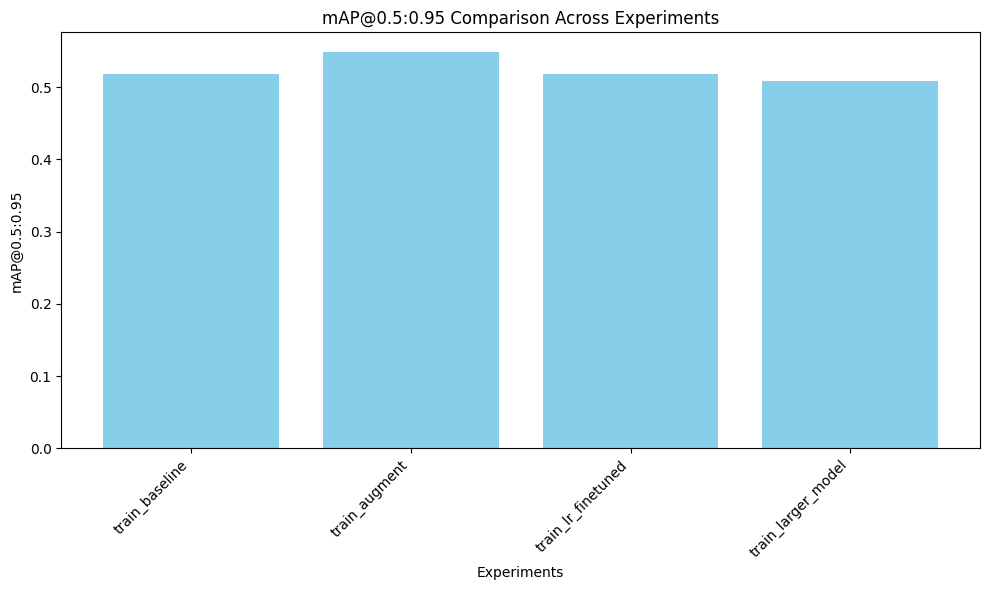

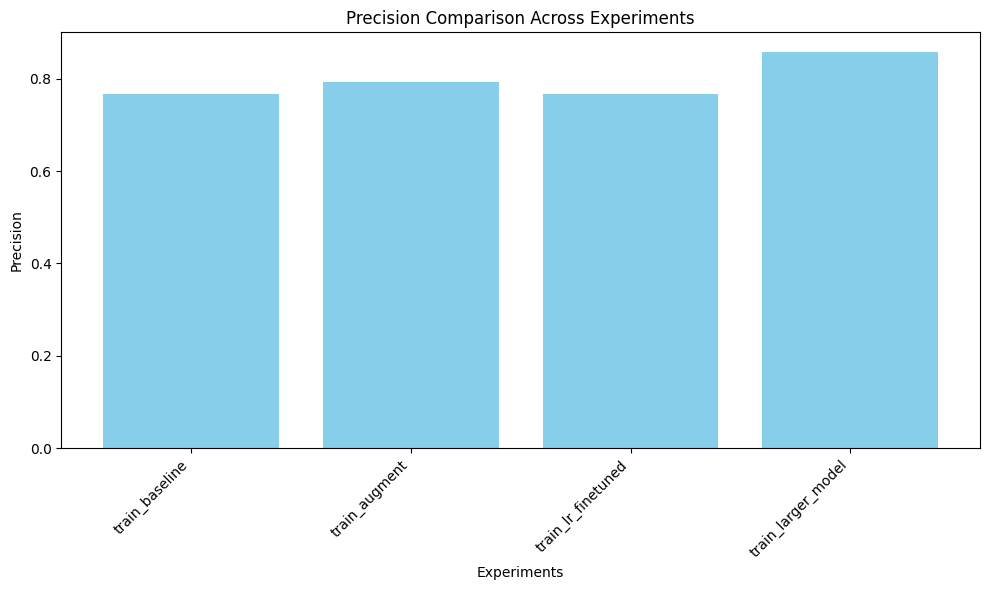

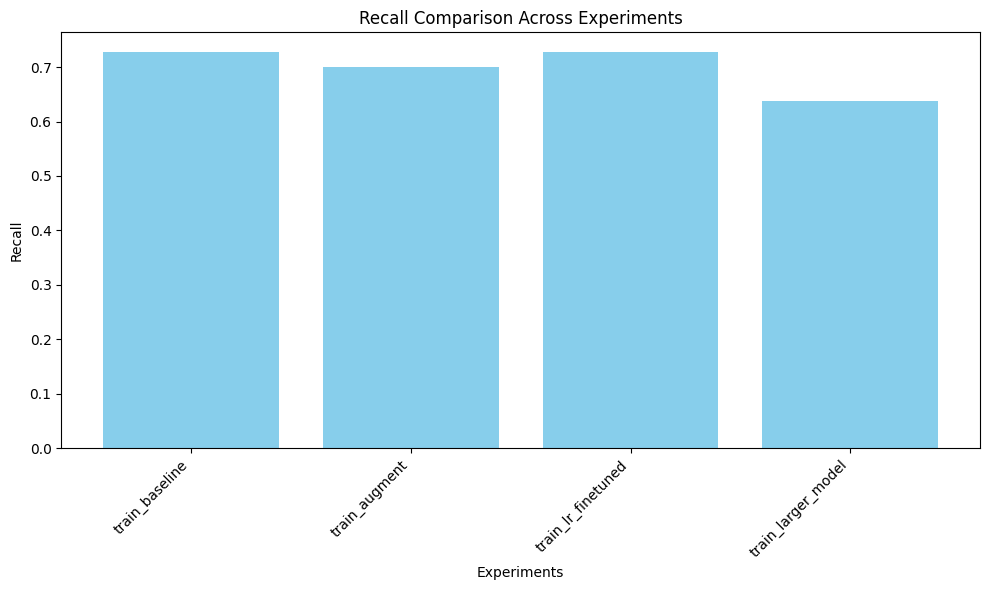

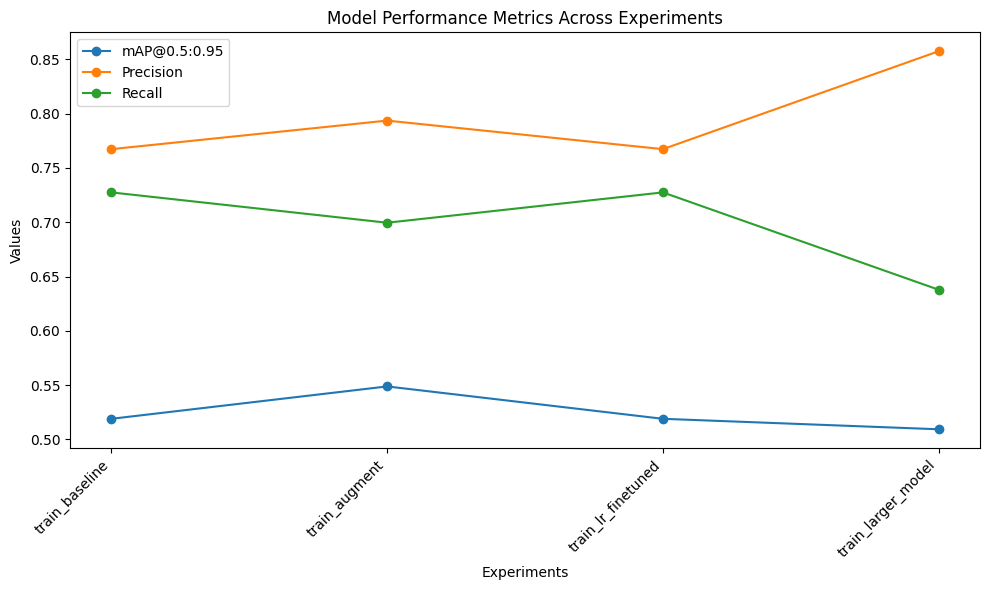

All experiments completed and results saved.


In [65]:
# Run experiments
for exp in experiments:
    print(f"Starting experiment: {exp['name']}...")

    # Load YOLO model (use a larger model if specified)
    model = YOLO(exp.get("model", "yolov8s.pt"))

    # Train model with specific configuration
    model.train(
        data=exp["dataset"],
        epochs=50,
        batch=16,
        imgsz=640,
        lr0=exp["lr0"],
        augment=exp["augment"],
        project=exp["name"],
        name=exp["name"],
        device=0,  # Use GPU
        save_period=1,
        plots=True
    )

    # Validate the model
    results = model.val(data=exp["dataset"], project=exp["name"], name=exp["name"])

    # Collect key metrics
    metrics = {
        "Experiment": exp["name"],
        "mAP@0.5:0.95": results.box.map,  # Mean Average Precision
        "Precision": results.box.mp,     # Mean Precision
        "Recall": results.box.mr         # Mean Recall
    }

    results_list.append(metrics)

# Convert results to a DataFrame
results_df = pd.DataFrame(results_list)

# Display the results table
print("\nComparison Table:")
print(results_df)

# Save the results as a CSV file
results_df.to_csv("/content/train_comparison_metrics.csv", index=False)

# Plot metrics
metrics_to_plot = ["mAP@0.5:0.95", "Precision", "Recall"]

# Bar charts for each metric
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    plt.bar(results_df["Experiment"], results_df[metric], color="skyblue")
    plt.title(f"{metric} Comparison Across Experiments")
    plt.xlabel("Experiments")
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Line plot for all metrics
plt.figure(figsize=(10, 6))
for metric in metrics_to_plot:
    plt.plot(results_df["Experiment"], results_df[metric], marker="o", label=metric)

plt.title("Model Performance Metrics Across Experiments")
plt.xlabel("Experiments")
plt.ylabel("Values")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

print("All experiments completed and results saved.")

## Find best model from ALL experiments

In [66]:
from ultralytics import YOLO

# Paths to each experiment's best.pt
experiment_paths = {
    "train_baseline": "/content/train_baseline/train_baseline/weights/best.pt",
    "train_augment": "/content/train_augment/train_augment/weights/best.pt",
    "train_lr_finetuned": "/content/train_lr_finetuned/train_lr_finetuned/weights/best.pt",
    "train_larger_model": "/content/train_larger_model/train_larger_model/weights/best.pt",
}

# Dictionary to store metrics for each experiment
experiment_metrics = {}

# Evaluate each model
for exp_name, model_path in experiment_paths.items():
    print(f"Evaluating model: {exp_name}...")
    model = YOLO(model_path)
    results = model.val(data="/content/test_dataset_1/data.yaml", device=0)  # Replace with test/validation dataset path

    # Store relevant metrics
    experiment_metrics[exp_name] = {
        "mAP@0.5:0.95": results.box.map,
        "Precision": results.box.mp,
        "Recall": results.box.mr,
    }

# Print the metrics for comparison
print("\nComparison of Model Performance:")
for exp_name, metrics in experiment_metrics.items():
    print(f"Experiment: {exp_name}")
    print(f"  mAP@0.5:0.95: {metrics['mAP@0.5:0.95']:.3f}")
    print(f"  Precision: {metrics['Precision']:.3f}")
    print(f"  Recall: {metrics['Recall']:.3f}")
    print()

# Identify the best model based on mAP@0.5:0.95
best_model = max(experiment_metrics, key=lambda x: experiment_metrics[x]["mAP@0.5:0.95"])
print(f"The best model is '{best_model}' with mAP@0.5:0.95 = {experiment_metrics[best_model]['mAP@0.5:0.95']:.3f}")


Evaluating model: train_baseline...
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/test_dataset_1/valid/labels.cache... 62 images, 0 backgrounds, 0 corrupt: 100%|██████████| 62/62 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 66, len(boxes) = 151. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]


                   all         62        151      0.767      0.728      0.764      0.519
                   hat         41         70      0.807      0.829      0.854      0.652
            sunglasses         39         81      0.728      0.626      0.675      0.386
Speed: 0.2ms preprocess, 10.5ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/val
Evaluating model: train_augment...
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/test_dataset_1/valid/labels.cache... 62 images, 0 backgrounds, 0 corrupt: 100%|██████████| 62/62 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 66, len(boxes) = 151. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]


                   all         62        151      0.767      0.728      0.764      0.519
                   hat         41         70      0.807      0.829      0.854      0.652
            sunglasses         39         81      0.728      0.626      0.675      0.386
Speed: 0.3ms preprocess, 14.6ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/val2
Evaluating model: train_lr_finetuned...
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/test_dataset_1/valid/labels.cache... 62 images, 0 backgrounds, 0 corrupt: 100%|██████████| 62/62 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 66, len(boxes) = 151. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]


                   all         62        151      0.767      0.728      0.764      0.519
                   hat         41         70      0.807      0.829      0.854      0.652
            sunglasses         39         81      0.728      0.626      0.675      0.386
Speed: 0.5ms preprocess, 14.0ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val3
Evaluating model: train_larger_model...
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/test_dataset_1/valid/labels.cache... 62 images, 0 backgrounds, 0 corrupt: 100%|██████████| 62/62 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 66, len(boxes) = 151. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]


                   all         62        151      0.858      0.638      0.724      0.509
                   hat         41         70       0.89      0.757      0.824      0.649
            sunglasses         39         81      0.825      0.519      0.625       0.37
Speed: 0.3ms preprocess, 24.1ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/detect/val4

Comparison of Model Performance:
Experiment: train_baseline
  mAP@0.5:0.95: 0.519
  Precision: 0.767
  Recall: 0.728

Experiment: train_augment
  mAP@0.5:0.95: 0.519
  Precision: 0.767
  Recall: 0.728

Experiment: train_lr_finetuned
  mAP@0.5:0.95: 0.519
  Precision: 0.767
  Recall: 0.728

Experiment: train_larger_model
  mAP@0.5:0.95: 0.509
  Precision: 0.858
  Recall: 0.638

The best model is 'train_baseline' with mAP@0.5:0.95 = 0.519


## Experiment with Video

In [67]:
import cv2
from ultralytics import YOLO

# Function to process video and save annotated results
def process_video(video_in_filepath, video_out_filepath, model):
    video_reader = cv2.VideoCapture(video_in_filepath)

    # Get video properties
    nb_frames = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_h = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frame_w = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    fps = video_reader.get(cv2.CAP_PROP_FPS)

    # Set up video writer
    video_writer = cv2.VideoWriter(
        video_out_filepath,
        cv2.VideoWriter_fourcc(*'mp4v'),
        fps,
        (frame_w, frame_h)
    )

    # Loop through frames and process
    for _ in range(nb_frames):
        success, frame = video_reader.read()
        if not success:
            break

        # YOLO inference
        results = model(frame)
        annotated_frame = results[0].plot()

        # Write annotated frame to output video
        video_writer.write(annotated_frame)

    video_reader.release()
    video_writer.release()

# Example Usage
input_video = "/content/Test_Video2.mp4"  # Update with the path to your video
output_video = "/content/Output_video2.mp4"

model = YOLO("/content/best.pt")  # Load your trained model
process_video(input_video, output_video, model)

# Visualize the processed video
#from IPython.display import Video
#Video(output_video, embed=True)


In [68]:
# Example Usage
input_video = "/content/Test_Video2.mp4"  # Update with the path to your video
output_video = "/content/Output_video2.mp4"

model = YOLO("/content/best.pt")  # Load your trained model
process_video(input_video, output_video, model)

# Visualize the processed video
from IPython.display import Video
Video(output_video, embed=True)